In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Load different filters (examples: substitute with your filenames)
hdu_f110w = fits.open("F110.fits")[1].data
hdu_f160w = fits.open("F160.fits")[1].data
hdu_f128w = fits.open("F128.fits")[1].data
hdu_f164w = fits.open("F164.fits")[1].data

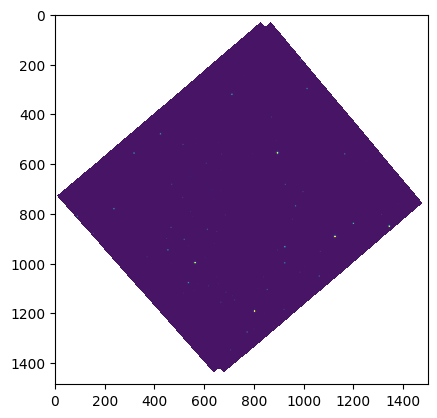

In [31]:
plt.imshow(hdu_f128w, vmin=-5, vmax=95)

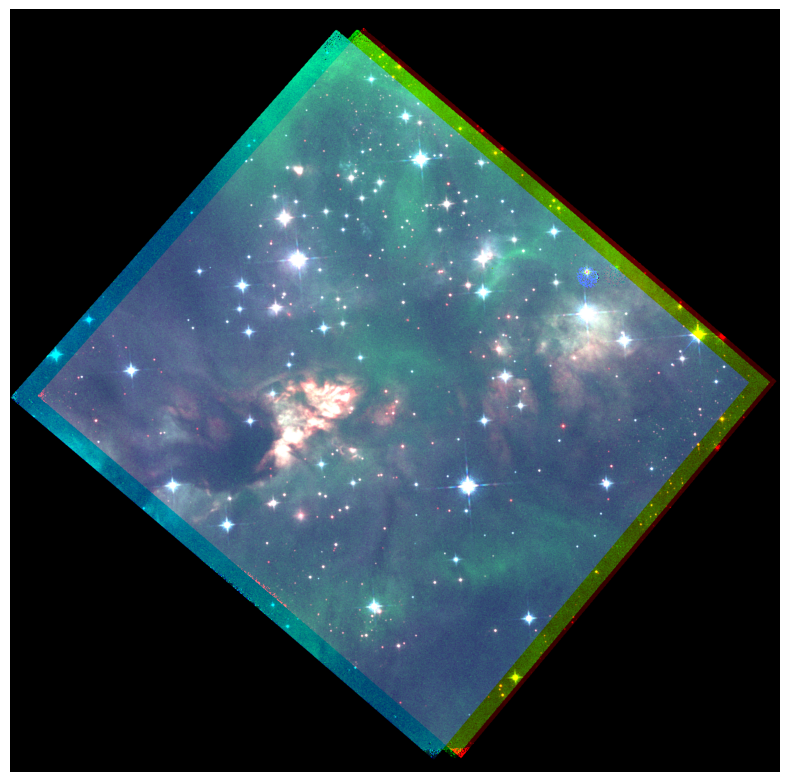

In [ ]:
# Load data  
im_r = hdu_f160w  # Red channel
im_g = hdu_f128w  # Green channel
im_b = hdu_f110w  # Blue channel

# (Optional) Use arcsinh stretch for better display of faint structures
def scale_arr(arr, scale=1.0):
    arr = np.nan_to_num(arr)  # Handle NaNs
    arr = arr / np.percentile(arr, 99) * scale
    arr = np.arcsinh(arr)  # More dynamic range
    return np.clip(arr, 0, 1)

rgb = np.dstack([
    scale_arr(im_r),
    scale_arr(im_g),
    scale_arr(im_b)
])

plt.figure(figsize=(8,8))
plt.imshow(rgb, origin='lower')
plt.axis('off')
plt.tight_layout()
plt.savefig('IRAS16562_falsecolor.png', dpi=300)
plt.show()